In [2]:
import nltk
# Ensure NLTK searches for data in the correct directory
nltk.data.path.append("C:\\Users\\gowth\\AppData\\Roaming\\nltk_data")
# Now proceed with your code
nltk.download('averaged_perceptron_tagger')  # Optional, but ensures it's available
nltk.data.path.append("C:\\Users\\gowth\\AppData\\Roaming\\nltk_data")
nltk.download('averaged_perceptron_tagger_eng')


import pandas as pd   # Importing the pandas library
import re    # Importing the regular expression library
from nltk.tokenize import RegexpTokenizer    # Importing the RegexpTokenizer from the nltk.tokenize module
import nltk    # Importing the nltk library
from nltk.stem import WordNetLemmatizer    # Importing the WordNetLemmatizer from the nltk.stem module
from nltk.corpus import wordnet    # Importing the wordnet from the nltk.corpus module
from sklearn.model_selection import train_test_split    # Importing the train_test_split from the sklearn.model_selection module
from sklearn.feature_extraction.text import TfidfVectorizer   # Importing the TfidfVectorizer from the sklearn.feature_extraction.text module
from sklearn.linear_model import LogisticRegression   # Importing the LogisticRegression from the sklearn.linear_model module
from sklearn.metrics import confusion_matrix, classification_report,  roc_curve, auc    # Importing the confusion_matrix, classification_report, roc_curve, auc from the sklearn.metrics module
import nltk   # Importing the nltk library
import matplotlib.pyplot as plt   # Importing the matplotlib.pyplot from the matplotlib library
import seaborn as sns   # Importing the seaborn from the seaborn library

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\gowth\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\gowth\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


In [3]:
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gowth\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\gowth\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gowth\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\gowth\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gowth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
# Load the dataset
DATASET_COLUMNS=['target','ids','date','flag','user','text']    # Column names of the dataset
DATASET_ENCODING='ISO-8859-1'    # Encoding of the dataset (maps characters to binary representations)

df=pd.read_csv('sentiment.csv',encoding=DATASET_ENCODING,names=DATASET_COLUMNS)    # Read the dataset

In [5]:
#next step is to clean all the unnecessary data from the dataset(such as @ symbols, links, etc.) and then split the dataset into training and testing datasets

#print(df['target'].value_counts())    # Print the count of each sentiment in the dataset
#there are only two target values in the dataset, 0 and 4. 0 represents negative sentiment and 4 represents positive sentiment
#so this will be a binary classification problem

df['target']=df['target'].replace(4,1)    # Replace 4 with 1 in the target column

In [6]:
# Data Cleaning
def clean_text(text):
    #these are the list of stopwords that we will remove from the text(because they do not add any value to the text)
    #these are very common words that do not have anything to do with the sentiment of the text
    stopwordlist = [
        'a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
        'and', 'any', 'are', 'as', 'at', 'be', 'because', 'been', 'before',
        'being', 'below', 'between', 'both', 'by', 'can', 'd', 'did', 'do',
        'does', 'doing', 'down', 'during', 'each', 'few', 'for', 'from',
        'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
        'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
        'into', 'is', 'it', "it's", 'its', 'itself', 'just', 'll', 'm', 'ma',
        'me', 'more', 'most', 'my', 'myself', 'needn', 'no', 'nor', 'now',
        'o', 'of', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves',
        'out', 'own', 're', 's', 'same', 'she', "shes", 'should', "shouldve", 'so', 'some', 'such',
        't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
        'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
        'through', 'to', 'too', 'under', 'until', 'up', 've', 'very', 'was',
        'we', 'were', 'what', 'when', 'where', 'which', 'while', 'who', 'whom',
        'why', 'will', 'with', 'won', 'y', 'you', "youd", "youll", "youre",
        "youve", 'your', 'yours', 'yourself', 'yourselves'
    ]
    
    # Function to get NLTK POS tag to WordNet POS tag
    def get_wordnet_pos(treebank_tag):
        if treebank_tag.startswith('J'):    # if the word is Adjective
            return wordnet.ADJ  # Return the wordnet.ADJ
        elif treebank_tag.startswith('V'):  # if the word is Verb
            return wordnet.VERB # Return the wordnet.VERB
        elif treebank_tag.startswith('N'):  # if the word is Noun
            return wordnet.NOUN # Return the wordnet.NOUN
        elif treebank_tag.startswith('R'):  # if the word is Adverb
            return wordnet.ADV  # Return the wordnet.ADV
        else:
            return wordnet.NOUN # Return the wordnet.NOUN
        
        
    #convert all text to lowercase
    text=text.lower()
    
    #remove all the links(url's)
    text = re.sub(r'((www\.[^\s]+)|(https?://[^\s]+))', ' ',text)
    
    #replace @mentions with the word 'USER'
    text=re.sub(r'@[^\s]+','USER',text)
    
    #remove hashtags but keep the text
    text = re.sub(r'#(\S+)',r'\1',text)
    
    #remove digits
    text = re.sub(r'\d+','',text)
    
    #remove whitespaces
    text = re.sub(r'\s+',' ',text)
    
    #strip leading and trailing whitespaces
    text = text.strip()
    
    #remove stopwords
    text = " ".join([word for word in text.split() if word not in stopwordlist])
    
    #tokenize the text
    #process of splitting text into smaller units called tokens (words, subwords, or characters) before feeding them into a machine learning (ML) model.
    tokenizer = RegexpTokenizer(r'\w+|[^\w\s]') #r'\w-->this matches any word character (alphanumeric & underscore) and |[^\w\s]-->this matches any non-word character
    tokens = tokenizer.tokenize(text)
    
    #parts of speech tagging
    post_tags=nltk.pos_tag(tokens)
    
    #lemmaization of the text(noun to root noun, verb to root verb, etc.)
    #Lemmatization is the process of reducing a word to its base or dictionary form (lemma) while considering its meaning and context.
    lemmatizer = nltk.WordNetLemmatizer()
    lemmatized_tokens=[lemmatizer.lemmatize(token,pos=get_wordnet_pos(tag)) for token,tag in post_tags]
    
    return " ".join(lemmatized_tokens)   # Return the cleaned text

    #this is the end of cleaning function and now we will apply this function to the text column of the dataset

In [7]:
df

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,1,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,1,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,1,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,1,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [8]:
df['text'] = df['text'].apply(clean_text)    # Apply the clean_text function to the text column of the dataset
print("✅ Text cleaning completed!")

✅ Text cleaning completed!


In [9]:
print(df['text'].head(10))

0    USER - awww , that ' s bummer . shoulda get da...
1    upset can ' t update facebook texting it . . ....
2    USER dive many time ball . manage save % rest ...
3                      whole body feel itchy like fire
4    USER no , not behave all . i ' m mad . here ? ...
5                                  USER not whole crew
6                                             need hug
7    USER hey long time see ! yes . . rain bit , on...
8                                   USER nope didn ' t
9                                     USER que muera ?
Name: text, dtype: object


In [10]:
#split the dataset into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['target'], test_size=0.2, random_state=42)    # Split the dataset into training and testing datasets

'''x_train: Training features (80% of df['text'])
x_test: Testing features (20% of df['text'])
y_train: Training labels (80% of df['target'])
y_test: Testing labels (20% of df['target'])'''

"x_train: Training features (80% of df['text'])\nx_test: Testing features (20% of df['text'])\ny_train: Training labels (80% of df['target'])\ny_test: Testing labels (20% of df['target'])"

In [11]:
#now we need to vectorize the text data using the TfidfVectorizer(term frequency-inverse document frequency)
#it is used to evaluate how important a word is to a document in a collection or corpus
#A vectorizer is used in Natural Language Processing (NLP) to convert text data into numerical form so that machine learning models can process it

# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=500000, ngram_range=(1, 2))   #here max_features is the maximum number of features to keep and ngram_range is the range of n-grams to extract

# Fit and transform the training data
X_train_vect = vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_vect = vectorizer.transform(X_test)

In [17]:
#function for evaluating the model
def evaluate_model(model):
    model.fit(X_train_vect, y_train)    # Fit the model (it means training the model)
    y_pred = model.predict(X_test_vect)    # Predict the target values
    
    print(classification_report(y_test, y_pred))    # Print the classification report(It provides key metrics to evaluate the model’s accuracy and effectiveness for each class)
    
    cm = confusion_matrix(y_test, y_pred)   # Compute the confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')  # Plot the confusion matrix
    plt.xlabel('Predicted')   # Label the x-axis
    plt.ylabel('Actual')    # Label the y-axis
    plt.show()  # Display the plot

    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test_vect)[:, 1])   # Compute the ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))    # Plot the ROC curve
    plt.plot([0, 1], [0, 1], 'k--')   # Plot the diagonal line
    plt.xlabel('False Positive Rate')   # Label the x-axis
    plt.ylabel('True Positive Rate')    # Label the y-axis
    plt.title('ROC Curve')  # Set the title
    plt.legend(loc="lower right")   # Set the legend
    plt.show()  # Display the plot

In [19]:
'''
A Confusion Matrix is a table that summarizes how well a classification model performed. It shows actual vs. predicted values.

	                Predicted: Positive	      Predicted: Negative
Actual: Positive	True Positive (TP) ✅	False Negative (FN) ❌
Actual: Negative	False Positive (FP) ❌	True Negative (TN) ✅

TP (True Positive): Model correctly predicted positive.
TN (True Negative): Model correctly predicted negative.
FP (False Positive): Model wrongly predicted positive (Type I Error).
FN (False Negative): Model wrongly predicted negative (Type II Error).

The ROC Curve plots True Positive Rate (Recall) vs. False Positive Rate for different threshold values.

True Positive Rate (TPR) = Recall = TP / (TP + FN)
False Positive Rate (FPR) = FP / (FP + TN)
The diagonal line (y = x) represents a random guess.
The higher the curve, the better the model.

Area Under the Curve (AUC) shows overall performance:
AUC = 1 → Perfect model ✅
AUC > 0.9 → Excellent model 🔥
AUC ~ 0.5 → Random guessing ❌
'''

'\nA Confusion Matrix is a table that summarizes how well a classification model performed. It shows actual vs. predicted values.\n\n\t                Predicted: Positive\t      Predicted: Negative\nActual: Positive\tTrue Positive (TP) ✅\tFalse Negative (FN) ❌\nActual: Negative\tFalse Positive (FP) ❌\tTrue Negative (TN) ✅\n\nTP (True Positive): Model correctly predicted positive.\nTN (True Negative): Model correctly predicted negative.\nFP (False Positive): Model wrongly predicted positive (Type I Error).\nFN (False Negative): Model wrongly predicted negative (Type II Error).\n\nThe ROC Curve plots True Positive Rate (Recall) vs. False Positive Rate for different threshold values.\n\nTrue Positive Rate (TPR) = Recall = TP / (TP + FN)\nFalse Positive Rate (FPR) = FP / (FP + TN)\nThe diagonal line (y = x) represents a random guess.\nThe higher the curve, the better the model.\n\nArea Under the Curve (AUC) shows overall performance:\nAUC = 1 → Perfect model ✅\nAUC > 0.9 → Excellent model 

In [14]:
# Initialize the LogisticRegression model
lr_model=LogisticRegression(C=2,max_iter=1000,n_jobs=-1)    

#c is the inverse regularization strength, which helps to avoid overfitting (higher c value means less regularization and the model will overfit)
#max_iter is the maximum number of iterations taken for the solvers to converge
#n_jobs is the number of CPU cores used when parallelizing over classes (paralled processing)

              precision    recall  f1-score   support

           0       0.81      0.79      0.80    159494
           1       0.80      0.82      0.81    160506

    accuracy                           0.81    320000
   macro avg       0.81      0.81      0.81    320000
weighted avg       0.81      0.81      0.81    320000



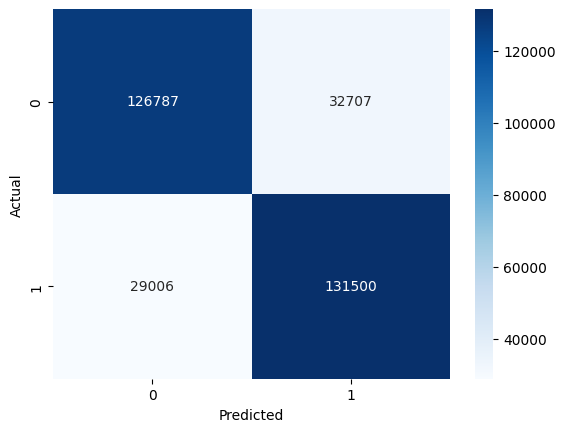

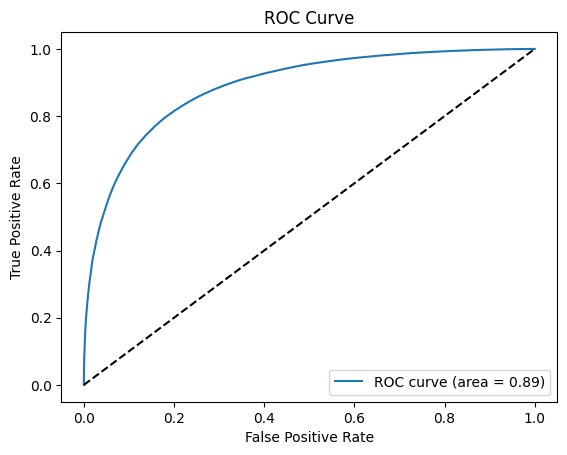

In [18]:
#now we will evaluate the model using evaluate_model function
evaluate_model(lr_model)

In [16]:
'''Precision-->Out of all predicted positives, how many were actually correct?
   Recall-->Out of all actual positives, how many were predicted correctly?
   F1-Score-->The weighted average of Precision and Recall
   support-->The number of actual occurrences of the class in the specified dataset
   Accuracy-->The percentage of correct predictions made by the model
   Macro avg-->The average of the precision, recall, and F1 score for all classes
   Weighted avg-->The weighted average of the precision, recall, and F1 score for all classes
'''

'Precision-->Out of all predicted positives, how many were actually correct?\n   Recall-->Out of all actual positives, how many were predicted correctly?\n   F1-Score-->The weighted average of Precision and Recall\n   support-->The number of actual occurrences of the class in the specified dataset\n   Accuracy-->The percentage of correct predictions made by the model\n   Macro avg-->The average of the precision, recall, and F1 score for all classes\n   Weighted avg-->The weighted average of the precision, recall, and F1 score for all classes\n'

In [20]:
# Example test tweets
test_tweets = [
    "I hate the new design of your website! It's too bad!",
    "I love Striver's YouTube channel very much",
    "This guy always teaches good"
]

# Clean the test tweets
cleaned_tweets = [clean_text(tweet) for tweet in test_tweets]

# Transform the cleaned tweets using the same vectorizer
vectorized_tweets = vectorizer.transform(cleaned_tweets)

# Predict the sentiment for each tweet
predicted_sentiments = lr_model.predict(vectorized_tweets)

# Output the results
for tweet, sentiment in zip(test_tweets, predicted_sentiments):
    print(f"Tweet: {tweet}")
    print(f"Predicted Sentiment: {'Positive' if sentiment == 1 else 'Negative'}\n")


Tweet: I hate the new design of your website! It's too bad!
Predicted Sentiment: Negative

Tweet: I love Striver's YouTube channel very much
Predicted Sentiment: Positive

Tweet: This guy always teaches good
Predicted Sentiment: Positive

